In [ ]:
import numpy as np
import tensorflow.keras
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.models import Model
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical 
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

np.random.seed(0)

In [ ]:
(X_train, y_train), (X_test, y_test)= mnist.load_data()

print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."


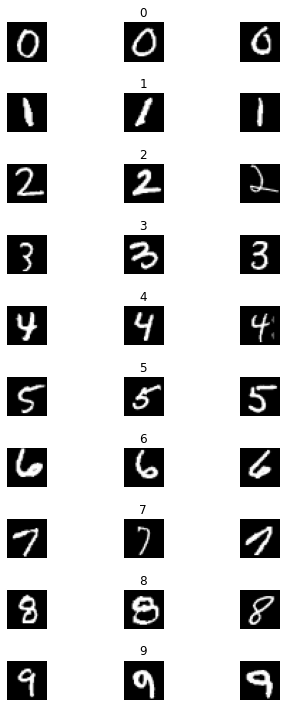

In [ ]:
num_of_samples=[]
 
cols = 3
num_classes = 10
 
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,10))
fig.tight_layout()
 
for i in range(cols):
    for j in range(num_classes):
      x_selected = X_train[y_train == j]
      axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
      axs[j][i].axis("off")
      if i == 1:
        axs[j][i].set_title(str(j))
        num_of_samples.append(len(x_selected))

In [ ]:
# Adding depth to our images
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)
 
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
 
X_train = X_train/255
X_test = X_test/255

In [ ]:
# define the larger model
def leNet_model():
  # create model
  model = Sequential()
  #         Conv2D(# of filters, tuple(size of filters), input_shape)
  model.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu'))
  #         MaxPooling2D(pool_size() = max number in the neighborhood ie: 2x2)
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Conv2D(15, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  
  model.add(Flatten())
  model.add(Dense(500, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation='softmax'))
  # Compile model
  model.compile(Adam(learning_rate = 0.01), loss='categorical_crossentropy', metrics=['accuracy'])
  return model
model = leNet_model()
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 24, 24, 30)        780       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 30)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 15)        4065      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 15)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 375)               0         
                                                                 
 dense_2 (Dense)             (None, 500)              

In [ ]:
#Model training
history=model.fit(X_train, y_train, epochs=10,  validation_split = 0.1, batch_size = 400, verbose = 1, shuffle = 1) 

Epoch 1/10
135/135 [==============================] - 12s 16ms/step - loss: 0.2447 - accuracy: 0.9224 - val_loss: 0.0521 - val_accuracy: 0.9845
Epoch 2/10
135/135 [==============================] - 2s 14ms/step - loss: 0.0721 - accuracy: 0.9783 - val_loss: 0.0456 - val_accuracy: 0.9868
Epoch 3/10
135/135 [==============================] - 2s 15ms/step - loss: 0.0591 - accuracy: 0.9817 - val_loss: 0.0616 - val_accuracy: 0.9810
Epoch 4/10
135/135 [==============================] - 2s 14ms/step - loss: 0.0535 - accuracy: 0.9834 - val_loss: 0.0400 - val_accuracy: 0.9883
Epoch 5/10
135/135 [==============================] - 2s 14ms/step - loss: 0.0469 - accuracy: 0.9859 - val_loss: 0.0393 - val_accuracy: 0.9887
Epoch 6/10
135/135 [==============================] - 2s 14ms/step - loss: 0.0424 - accuracy: 0.9868 - val_loss: 0.0378 - val_accuracy: 0.9888
Epoch 7/10
135/135 [==============================] - 2s 14ms/step - loss: 0.0408 - accuracy: 0.9876 - val_loss: 0.0440 - val_accuracy: 0.988

Text(0.5, 0, 'epoch')

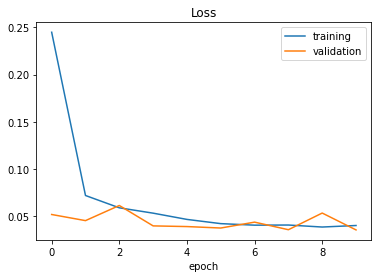

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

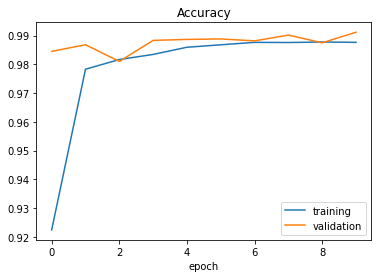

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
 
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.0314006544649601
Test accuracy: 0.9902999997138977


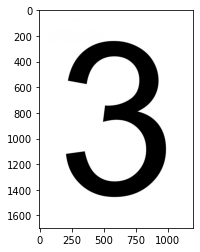

In [ ]:
#predict internet number
import requests
import cv2
from PIL import Image
url = 'https://printables.space/files/uploads/download-and-print/large-printable-numbers/3-a4-1200x1697.jpg'
 
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

predicted digit: [3]


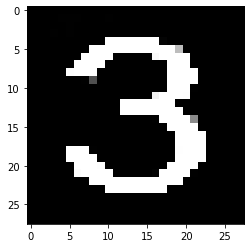

In [ ]:
img = np.asarray(img)
img = cv2.resize(img, (28, 28))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.bitwise_not(img)
plt.imshow(img, cmap=plt.get_cmap('gray'))
 
img = img/255
img = img.reshape(1,28,28,1)
 
predict_x = model.predict(img) 
prediction = np.argmax(predict_x, axis=1)

print("predicted digit: "+str(prediction))